#Preprocessing the dataset

In [ ]:
#Download the dataset
!gdown --id 18V4W8LrAuCibf_74eacJBvBjb4sIK_ia
file = open("/content/citation_sentiment_corpus.txt", 'r', encoding="utf-8")

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18V4W8LrAuCibf_74eacJBvBjb4sIK_ia
To: /content/citation_sentiment_corpus.txt
100% 2.25M/2.25M [00:00<00:00, 34.2MB/s]


In [ ]:
import string, re
import pandas as pd

def processText(text):
  # punc = "‘!#$%'*+,-./:;?@\^_`{|}~’‟“”–„()[]<=>"
  # We should't remove () [] . , " &
  punctuationfree="".join([i for i in text if i not in string.punctuation])
  punctuationfree = re.sub('\s+', ' ',punctuationfree)
  return punctuationfree.lower()

df = pd.read_csv("/content/citation_sentiment_corpus.txt", sep="\t",header=None, comment='#')
df.rename(columns = {0:'Source paper', 1:'Target Paper', 2:'LABEL', 3:'CITATION'}, inplace = True)
df['LABEL'].replace({'n': -1,'o': 0, 'p': 1}, inplace = True)
df['CITATION'] = df['CITATION'].apply(processText)

In [ ]:
# save the dataframe to a csv file
df.to_csv('citation_sentiment_corpus.csv', index=False, columns=['CITATION', 'LABEL'])

# Percentage split

In [ ]:
# download the csv file 
!gdown 1Qirf-JPBzvZXino-GT_as2KPeRTtbazz
import pandas as pd
import numpy as np

df = pd.read_csv("/content/citation_sentiment_corpus.csv")

# split the dataset into train: 60%, test:20% validation: 20%
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

train_size = 0.6
validate_size = 0.2
train, validate, test = np.split(df.sample(frac=1), [int(train_size * len(df)), int((validate_size + train_size) * len(df))])

train.to_csv('train.csv', index=False, columns=['CITATION', 'LABEL'])
validate.to_csv('validate.csv', index=False, columns=['CITATION', 'LABEL'])
test.to_csv('test.csv', index=False, columns=['CITATION', 'LABEL'])

Downloading...
From: https://drive.google.com/uc?id=1Qirf-JPBzvZXino-GT_as2KPeRTtbazz
To: /content/citation_sentiment_corpus.csv
100% 1.96M/1.96M [00:00<00:00, 20.0MB/s]


In [ ]:
df2=df.assign(Positive=lambda x: x.LABEL == 1, Objective=lambda x: x.LABEL == 0, Negative=lambda x: x.LABEL == -1)

df2["Positive"] = df2["Positive"].astype(int)
df2["Objective"] = df2["Objective"].astype(int)
df2["Negative"] = df2["Negative"].astype(int)

train_size = 0.6
validate_size = 0.2
train2, validate2, test2= np.split(df2.sample(frac=1), [int(train_size * len(df)), int((validate_size + train_size) * len(df))])

train2.to_csv('train2.csv', index=False)
validate2.to_csv('validate2.csv', index=False)
test2.to_csv('test2.csv', index=False)

#K-Cross Validation split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive', force_remount='False')
df = pd.read_csv("/content/drive/MyDrive/Studies/PFE Master/articles/citation_sentiment_corpus.csv")
df2=df.assign(Positive=lambda x: x.LABEL == 1, Objective=lambda x: x.LABEL == 0, Negative=lambda x: x.LABEL == -1)
df["Positive"] = df2["Positive"].astype(int)
df["Objective"] = df2["Objective"].astype(int)
df["Negative"] = df2["Negative"].astype(int)

Mounted at /content/drive


In [ ]:
df.head()

,CITATION,LABEL,Positive,Objective,Negative
0,we analyzed a set of articles and identified s...,0,0,1,0
1,table 3 example compressions compression avgle...,0,0,1,0
2,53 related works and discussion our twostep mo...,0,0,1,0
3,1999 proposed a summarization system based on ...,0,0,1,0
4,we found that the deletion of lead parts did n...,0,0,1,0


In [ ]:
from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
result = next(kf.split(df), None)

train = df.iloc[result[0]]
test_val =  df.iloc[result[1]]
kf = KFold(n_splits = 2, shuffle = True, random_state = 2)
result = next(kf.split(test_val), None)
val = df.iloc[result[0]]
test = df.iloc[result[1]]

In [ ]:
print(test.shape)#20.00 %
print(train.shape)#63.98 %
print(val.shape)#16.00 %

(874, 5)
(6988, 5)
(874, 5)


In [ ]:
train.to_csv('/content/drive/MyDrive/Studies/PFE Master/Datasets/trainKFold.csv', index=False, columns=['CITATION', 'Positive', 'Objective', 'Negative'])
val.to_csv('/content/drive/MyDrive/Studies/PFE Master/Datasets/validateKFold.csv', index=False, columns=['CITATION', 'Positive', 'Objective', 'Negative'])
test.to_csv('/content/drive/MyDrive/Studies/PFE Master/Datasets/testKFold.csv', index=False, columns=['CITATION', 'Positive', 'Objective', 'Negative'])

#Fine tuning Scibert for multi-labels

In [ ]:
!nvidia-smi

Sun Sep  4 11:26:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers
!pip install pytorch-lightning
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [8]:
drive.mount('/content/drive', force_remount='False')

path_test = "/content/drive/MyDrive/Studies/PFE Master/Datasets/testKFold.csv" #20%
path_train = "/content/drive/MyDrive/Studies/PFE Master/Datasets/trainKFold.csv" # 60%
path_validate = "/content/drive/MyDrive/Studies/PFE Master/Datasets/validateKFold.csv"# 20%

test_data = pd.read_csv(path_test)
train_data = pd.read_csv(path_train)
validate_data = pd.read_csv(path_validate)

attributes = train_data.columns.tolist()[1:]
#test_data.drop(labels=['LABEL'], axis=1, inplace=True)
#train_data.drop(labels=['LABEL'], axis=1, inplace=True)
#validate_data.drop(labels=['LABEL'], axis=1, inplace=True)

Mounted at /content/drive


In [9]:
model_name = "bert-large-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
#classifier = pipeline("sentiment-analysis", model = model, tokenizer=tokenizer)

In [ ]:
validate_data.head()

,CITATION,Positive,Objective,Negative
0,automatic text summarization approaches have o...,0,1,0
1,additionally some research has explored cuttin...,0,1,0
2,but in fact the issue of editing in text summa...,1,0,0
3,jing and mckeown 2000 and jing 2000 propose a ...,0,1,0
4,our work in sentence reformulation is differen...,0,1,0


In [ ]:
validate_data['Negative'].value_counts()

0    852
1     22
Name: Negative, dtype: int64

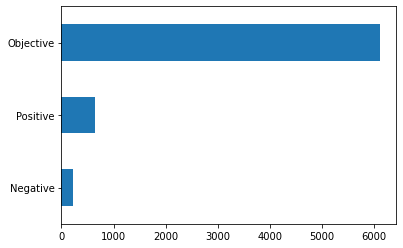

In [6]:
#attributes = ['Positive', 'Objective','Negative']
#train_data[attributes].sum().plot.bar()

train_data[attributes].sum().sort_values().plot(kind="barh");

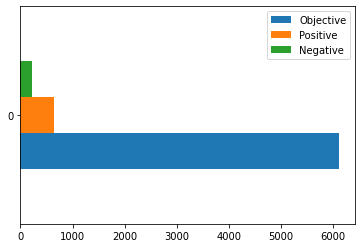

In [ ]:
o = train_data.loc[train_data['Objective'] == 1]
p = train_data.loc[train_data['Positive'] == 1]
n = train_data.loc[train_data['Negative'] == 1]

pd.DataFrame(dict(
  Objective=[len(o)],
  Positive=[len(p)],
  Negative=[len(n)]
)).plot(kind='barh');

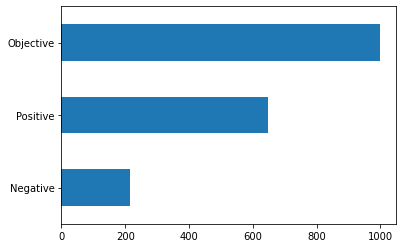

In [ ]:
train_df = pd.concat([
  n,p,
  o.sample(1000)
])
train_df[attributes].sum().sort_values().plot(kind="barh");

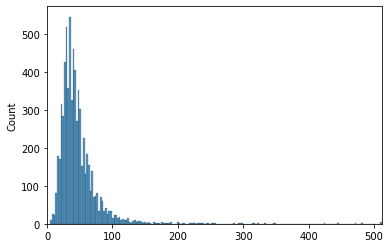

In [ ]:
#We need to specify the maximum number of tokens when encoding (512 is the maximum we can do). Let’s check the number of tokens per citation:
import seaborn as sns
token_counts = []

for _, row in train_data.iterrows():
  token_count = len(tokenizer.encode(
    row["CITATION"],
    max_length=512,
    truncation=True
  ))
  token_counts.append(token_count)
sns.histplot(token_counts)
plt.xlim([0, 512]);
#In the example Most of the comments contain less than 300 tokens or more than 512. So, we’ll stick with the limit of 512. for the MAX_TOKEN_COUNT = 512
# In our case MAX_TOKEN_COUNT would be 200

In [10]:
from torch.utils.data import Dataset

class Citations_Dataset(Dataset):

  def __init__(self, data_path, tokenizer, attributes, max_token_len: int = 256):
    self.data_path = data_path
    self.tokenizer = tokenizer
    self.attributes = attributes
    self.max_token_len = max_token_len
    data = pd.read_csv(self.data_path)
    self.data = data

    
  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    item = self.data.iloc[index]
    citation = str(item.CITATION)
    #attributes = torch.FloatTensor(item[self.attributes])
    labels = item[self.attributes]

    tokens = self.tokenizer.encode_plus(
        citation,
        add_special_tokens=True,
        return_tensors='pt',
        return_token_type_ids=False,
        truncation=True,
        padding='max_length',
        max_length=self.max_token_len,
        return_attention_mask = True
        )
    
    return dict(
      citation_text=citation,
      input_ids=tokens["input_ids"].flatten(),
      attention_mask=tokens["attention_mask"].flatten(),
      labels=torch.FloatTensor(labels)
    )

In [11]:
train_dataset = Citations_Dataset(
  path_train,
  tokenizer,
  attributes
)

validation_dataset = Citations_Dataset(
  path_validate,
  tokenizer,
  attributes
)

test_dataset = Citations_Dataset(
  path_test,
  tokenizer,
  attributes
)

In [12]:
import pytorch_lightning as pl
from torch.utils.data import DataLoader

In [13]:
import numpy as np
import random

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(0)

In [14]:
class Citations_Data_Module(pl.LightningDataModule):

  def __init__(self, train_path, val_path, test_path, attributes, batch_size = 8, max_token_length: int = 256, tokenizer= tokenizer):
    super().__init__()
    self.train_path = train_path
    self.val_path = val_path
    self.test_path = test_path
    self.attributes = attributes
    self.batch_size = batch_size
    self.max_token_length = max_token_length
    self.tokenizer = tokenizer

  def setup(self, stage = None):
    if stage in (None, "fit"):
      self.train_dataset = Citations_Dataset(self.train_path, tokenizer=self.tokenizer, attributes=self.attributes)
      self.val_dataset = Citations_Dataset(self.val_path, tokenizer=self.tokenizer, attributes=self.attributes)
    if stage == 'predict':
      self.test_dataset = Citations_Dataset(self.test_path, attributes=self.attributes, tokenizer=self.tokenizer, sample=None)

  def train_dataloader(self):
    return DataLoader(self.train_dataset, batch_size = self.batch_size, num_workers=4, worker_init_fn=seed_worker, shuffle=True)

  def val_dataloader(self):
    return DataLoader(self.val_dataset, batch_size = self.batch_size, num_workers=4, worker_init_fn=seed_worker, shuffle=False)

  def test_dataloader(self):
    return DataLoader(self.test_dataset, batch_size = self.batch_size, num_workers=4, worker_init_fn=seed_worker, shuffle=False)

  def predict_dataloader(self):
    return DataLoader(self.test_dataset, batch_size=self.batch_size)

In [15]:
#Data_module = Citations_Data_Module(path_train, path_validate, attributes=attributes)
Data_module = Citations_Data_Module(path_train, path_validate, path_test, attributes=attributes)

In [16]:
Data_module.setup()

# Model

In [17]:
from transformers import AutoModel, AdamW, get_cosine_schedule_with_warmup
import torch.nn as nn
import math
from torchmetrics.functional.classification import auroc
import torchmetrics
import torch.nn.functional as F

### Calculating the weight of each class:
The documentation says:

> *For example, if a dataset contains 100 positive and 300 negative examples of a single class, then pos_weight for the class should be equal to 300/100=3. The loss would act as if the dataset contains math: 3times 100=300 positive examples.*

In [ ]:
#lbl = train_data['Negative'].value_counts()
#print(f"Neg Negative: {lbl[0]}, Pos Negative: {lbl[1]}, weight: {lbl[0]/lbl[1]}")
#wn = lbl[0]/lbl[1]
#lbl = train_data['Positive'].value_counts()
#print(f"Neg Positive: {lbl[0]}, Pos Positive: {lbl[1]}, weight: {lbl[0]/lbl[1]}")
#wp = lbl[0]/lbl[1]
#lbl = train_data['Objective'].value_counts()
#print(f"Neg Objective: {lbl[0]}, Pos Objective: {lbl[1]}, weight: {lbl[0]/lbl[1]}")
#wo = lbl[0]/lbl[1]
#weight = torch.tensor([wp, wo, wn], dtype=torch.float, device='cuda:0')

Neg Negative: 6774, Pos Negative: 214, weight: 31.654205607476637
Neg Positive: 6339, Pos Positive: 649, weight: 9.767334360554699
Neg Objective: 863, Pos Objective: 6125, weight: 0.14089795918367348


In [ ]:
#w = nn.Softmax(dim=0)(weight.float())

In [ ]:
#w

tensor([3.1236e-10, 2.0604e-14, 1.0000e+00], device='cuda:0')

In [ ]:
#w.data.cpu().numpy()[0]+w.data.cpu().numpy()[1]+w.data.cpu().numpy()[2]

1.0

In [18]:
#target = torch.tensor([0.4/3, 0.1/3, 2.5/3], dtype=torch.float)
target = torch.tensor([0.7/3, 0.1/3, 2.2/3], dtype=torch.float)
target

tensor([0.2333, 0.0333, 0.7333])

In [ ]:
#print(weight,target)

tensor([ 9.7673,  0.1409, 31.6542], device='cuda:0') tensor([0.2333, 0.0333, 0.7333])


In [19]:
class Citation_Classifier(pl.LightningModule):
    
  def __init__(self, config: dict):
    super().__init__()
    self.config = config
    self.pretrained_model = AutoModel.from_pretrained(config['model_name'], return_dict = True)
    self.hidden = nn.Linear(self.pretrained_model.config.hidden_size, self.pretrained_model.config.hidden_size)
    self.classifier = nn.Linear(self.pretrained_model.config.hidden_size, self.config['n_labels'])
    torch.nn.init.xavier_uniform_(self.classifier.weight)
    torch.nn.init.xavier_uniform_(self.hidden.weight)
    self.loss_func = nn.CrossEntropyLoss(weight = config['weights'])
    self.dropout = nn.Dropout()
    self.soft = nn.Softmax(dim=1)
   
  def forward(self, input_ids, attention_mask, labels=None):
    # scibert
    output = self.pretrained_model(input_ids=input_ids, attention_mask = attention_mask)
    pooled_output = torch.mean(output.last_hidden_state, 1)
    # final logits
    pooled_output = self.dropout(pooled_output)
    pooled_output = self.hidden(pooled_output)
    pooled_output = self.dropout(pooled_output)
    pooled_output = F.relu(pooled_output)
    #pooled_output = torch.sigmoid(pooled_output)#F.relu(pooled_output)  torch.sigmoid
    #pooled_output = self.dropout(pooled_output)

    #pooled_output = self.dropout(pooled_output)
    #pooled_output = self.hidden(pooled_output)
    pooled_output = self.dropout(pooled_output)
    logits = self.classifier(pooled_output) 
    #logits =  self.soft(pooled_output)
    # calculate loss
    loss = 0
    if labels is not None:
      loss = self.loss_func(logits.view(-1, self.config['n_labels']), labels.view(-1, self.config['n_labels']))
    return loss, logits

  def training_step(self, batch, batch_index):
    # loss, outputs = self(**batch)
    # self.log("train loss ", loss, prog_bar = True, logger=True)
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("train_loss", loss, prog_bar=True, logger=True)
    return {"loss": loss, "predictions": outputs, "labels": labels}

  def validation_step(self, batch, batch_index):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss

  def test_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss

  def predict_step(self, batch, batch_index):
    loss, outputs = self(**batch)
    return outputs

  def training_epoch_end(self, outputs):
    
    labels = []
    predictions = []
    for output in outputs:
      for out_labels in output["labels"].detach().cpu():
        labels.append(out_labels)
      for out_predictions in output["predictions"].detach().cpu():
        predictions.append(out_predictions)

    labels = torch.stack(labels).int()
    predictions = torch.stack(predictions)
    for i, name in enumerate(attributes):
      class_roc_auc = auroc(predictions[:, i], labels[:, i])
      self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)


  def configure_optimizers(self):
    optimizer = AdamW(self.parameters(), lr=self.config['lr'], weight_decay=self.config['weight_decay'])
    total_steps = self.config['train_size']/self.config['batch_size'] # The n training step
    warmup_steps = math.floor(total_steps * self.config['warmup'])

    #'warmup': 32, # (len(Data_module.train_dataloader())/4)/5 or tot steps * 0.2

    scheduler = get_cosine_schedule_with_warmup(optimizer, warmup_steps, total_steps)
    return [optimizer],[scheduler]


In [20]:
config = {
    'model_name': model_name,
    'n_labels': len(attributes),
    'batch_size': 32,
    'lr': 1.5e-5,
    'warmup': 0.2, 
    'train_size': len(Data_module.train_dataloader()),
    'weight_decay': 0.00,
    'n_epochs': 4,
    'weights' : target
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [21]:
MODEL_PATH = "/content/drive/MyDrive/Studies/PFE Master/"
MODEL_SAVING_NAME = "bert_large"
MODEL_SAVING_NAME += '_'
MODEL_SAVING_NAME += str('Cross_dhrdc')

In [22]:
model = Citation_Classifier(config)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
checkpoint_callback = ModelCheckpoint(
  dirpath=f'/content/drive/MyDrive/Studies/PFE Master/{MODEL_SAVING_NAME}/checkpoints/',
  filename="best-checkpoint",
  save_top_k=1,
  verbose=True,
  monitor="val_loss",
  mode="min"
)

logger = TensorBoardLogger(MODEL_PATH+MODEL_SAVING_NAME, name="lightning_logs")

In [ ]:
MODEL_PATH+MODEL_SAVING_NAME

'/content/drive/MyDrive/Studies/PFE Master/siebert_Cross_dhrdc'

In [24]:
#And early stopping triggers when the loss hasn’t improved for the last 2 epochs
#(you might want to remove/reconsider this when training on real-world projects):

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

# Train model

In [25]:
trainer = pl.Trainer(
  logger=logger,
  #checkpoint_callback=checkpoint_callback,
  callbacks=[checkpoint_callback, early_stopping_callback],
  max_epochs=config['n_epochs'],
  accelerator='cpu',
  #devices=1
  #progress_bar_refresh_rate=30
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1767: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,


In [ ]:
!nvidia-smi

Fri Sep  2 17:24:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |    790MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#torch.cuda.memory_summary(device=None, abbreviated=False)
#torch.cuda.empty_cache()
#trainer.fit(model, Data_module)

In [ ]:
#trainer.test()

In [ ]:
#import shutil

#original = r'lightning_logs'
#target = r'/content/drive/MyDrive/Studies/PFE Master/ScibertMSE4/lightning_logs'
#shutil.copytree(original, target)

In [ ]:
#https://towardsdatascience.com/everything-you-need-to-know-about-saving-weights-in-pytorch-572651f3f8de

#torch.save(model.state_dict(), f'/content/drive/MyDrive/Studies/PFE Master/{MODEL_SAVING_NAME}_state_dict.pth') #It saves only the weights of the model
#trained_model = Citation_Classifier(config)
#trained_model.load_state_dict(torch.load(f'/content/drive/MyDrive/Studies/PFE Master/{MODEL_SAVING_NAME}_state_dict.pth'))

#for name, param in trained_model.named_parameters():
#    print(name, ':', param.requires_grad)

In [ ]:
checkpoint_callback.best_model_path

''

In [26]:
trained_model_path = '/content/drive/MyDrive/Studies/bert_base_bce_drdc/checkpoints/best-checkpoint.ckpt'
#trained_model_path = trainer.checkpoint_callback.best_model_path
trained_model = Citation_Classifier.load_from_checkpoint(trained_model_path, config = config)

FileNotFoundError: ignored

In [ ]:
trained_model.eval()
trained_model.freeze()

In [ ]:
# Test the model on 1 random citation
a = test_data[test_data.Objective == 1].sample()
#a = test_data.sample()
test_citation = a.CITATION.values[0]
print(a[['Positive', 'Objective', 'Negative']])
print('=--------------------------------------=')

encoding = tokenizer.encode_plus(
  test_citation,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)

_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
#test_prediction = nn.Softmax(dim=1)(test_prediction)
test_prediction = test_prediction.flatten().numpy()
#test_prediction = test_prediction.detach().numpy()
for label, prediction in zip(attributes, test_prediction):
  print(f"{label}: {prediction}")

# Evaluation

In [ ]:
from tqdm.auto import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trained_model = trained_model.to(device)

predictions = []
labels = []

for item in tqdm(test_dataset):
  _, prediction = trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device),
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  #prediction = nn.Softmax(dim=1)(prediction)#
  predictions.append(prediction.flatten())
  labels.append(item["labels"].int())
  
predictions = torch.stack(predictions).detach().cpu()
labels = torch.stack(labels).detach().cpu()

In [ ]:
from torchmetrics.functional import accuracy, auroc
THRESHOLD = 0.5
accuracy(predictions, labels, threshold=THRESHOLD)

In [ ]:
print("AUROC per tag")

for i, name in enumerate(attributes):
  tag_auroc = auroc(predictions[:, i], labels[:, i], pos_label=1)
  print(f"{name}: {tag_auroc}")

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

#let’s check the classification report for each class.
#To make this work, we must apply thresholding to the predictions:
  
y_pred = predictions.numpy()
y_true = labels.numpy()

upper, lower = 1, 0
y_pred = np.where(y_pred > THRESHOLD, upper, lower)

print(classification_report(
  y_true,
  y_pred,
  target_names=attributes
))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + attributes)
ax.set_yticklabels([''] + attributes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier

f, axes = plt.subplots(1, 3, figsize=(30, 10))
for i in range(3):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true[:, i],
                                                   y_pred[:, i]),
                                  display_labels=["Other", attributes[i]])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(attributes[i])
    #if i<10:
    #disp.ax_.set_xlabel('')
    #if i%5!=0:
        #disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()
    disp.ax_.set(
                title=attributes[i], 
                xlabel='', 
                ylabel='')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
f.colorbar(disp.im_, ax=axes)
plt.show()


In [ ]:
tensorboard_path = MODEL_PATH+MODEL_SAVING_NAME+'/lightning_logs/'
tensorboard_path

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir "/content/drive/MyDrive/Studies/PFE Master/scibert_BCE_Soft/lightning_logs/"